In [20]:
# 데이터 전처리 및 분석 기본 코드
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager

f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

In [21]:
import os
# 현재 작업 디렉토리의 경로를 가져옴
dir_path = os.getcwd()
# 현재 작업 디렉토리의 모든 파일 이름을 가져와서 리스트에 저장
file_list = os.listdir(dir_path)
# csv 출력
for filename in file_list:
    if filename.endswith('.csv'):
        print(filename)

고위험음주율_추이_20230510152150.csv
서울시_음주운전교통사고비율_20102021.csv
서울시_음주운전사고현황_20102021(구단위).csv
시·군·구별_고위험음주율_20230514161548.csv
시·군·구별_월간음주율_20230514161511.csv
시·군·구별_자동차_또는_오토바이_운전자의_연간_음주운전_경험률_20230514161349.csv
연간_음주운전차량_동승률_추이_20230510151846.csv
연간_음주율_추이_20230510152258.csv
월간_음주율_추이_20230510152222.csv
월간_폭음률_추이_20230510152100.csv


In [22]:
# 연도별 음주운전 교통사고 비율
drunk_ac = pd.read_csv('서울시_음주운전교통사고비율_20102021.csv', encoding='cp949')
drunk_ac

,시점,음주운전교통사고 비율(A÷B×100) (%),음주운전 교통사고발생건수(A) (건),교통사고 발생건수(B) (건)
0,2010,9.4,3910,41662
1,2011,9.1,3700,40451
2,2012,9.4,3819,40829
3,2013,9.0,3550,39439
4,2014,8.2,3361,40792
5,2015,8.3,3453,41665
6,2016,7.2,2874,40039
7,2017,7.4,2864,38625
8,2018,7.4,2856,38795
9,2019,5.6,2190,39258


In [23]:
# 연간 음주율 추이
year_drink = pd.read_csv('연간_음주율_추이_20230510152258.csv', encoding='utf-8')
year_drink_all = year_drink[year_drink['특성별(2)']=='19세이상(표준화)']
year_drink_all = year_drink_all[year_drink_all['성별']=='전체']
year_drink_all

,성별,특성별(1),특성별(2),2010응답자수 (명),2010분율 (%),2010표준오차,2011응답자수 (명),2011분율 (%),2011표준오차,2012응답자수 (명),...,2018표준오차,2019응답자수 (명),2019분율 (%),2019표준오차,2020응답자수 (명),2020분율 (%),2020표준오차,2021응답자수 (명),2021분율 (%),2021표준오차
1,전체,전체,19세이상(표준화),6198,79.1,0.6,6008,79.3,0.6,5591,...,0.6,6195,79.2,0.7,5861,78.1,0.7,5636,76.9,0.8


In [24]:
columns_to_extract = year_drink_all.columns[year_drink_all.columns.str.contains('분율') | (year_drink_all.columns == '성별') | (year_drink_all.columns == '특성별(2)')]
year_drink_all_extracted = year_drink_all[columns_to_extract]
year_drink_all_extracted

,성별,특성별(2),2010분율 (%),2011분율 (%),2012분율 (%),2013분율 (%),2014분율 (%),2015분율 (%),2016분율 (%),2017분율 (%),2018분율 (%),2019분율 (%),2020분율 (%),2021분율 (%)
1,전체,19세이상(표준화),79.1,79.3,77.2,77.0,78.2,78.5,79.2,80.3,79.7,79.2,78.1,76.9


In [25]:
import pandas as pd
df = year_drink_all_extracted.copy()
df = df.drop('특성별(2)', axis=1)
df = df.drop('성별', axis=1)
df = df.T
df
#df_pivot = df.set_index(['성별', '특성별(2)'])[['2010분율 (%)', '2011분율 (%)', '2012분율 (%)', '2013분율 (%)', '2014분율 (%)', '2015분율 (%)', '2016분율 (%)', '2017분율 (%)', '2018분율 (%)', '2019분율 (%)', '2020분율 (%)', '2021분율 (%)']]
#df_pivot = df.pivot(index=['2010분율 (%)', '2011분율 (%)', '2012분율 (%)', '2013분율 (%)', '2014분율 (%)', '2015분율 (%)', '2016분율 (%)', '2017분율 (%)', '2018분율 (%)', '2019분율 (%)', '2020분율 (%)', '2021분율 (%)'])
#df_pivot

,1
2010분율 (%),79.1
2011분율 (%),79.3
2012분율 (%),77.2
2013분율 (%),77.0
2014분율 (%),78.2
2015분율 (%),78.5
2016분율 (%),79.2
2017분율 (%),80.3
2018분율 (%),79.7
2019분율 (%),79.2


In [26]:
import numpy as np

years = np.arange(2010, 2022)
df['연도'] = years
df = df.set_index('연도')

df = df.reset_index()
df = df.rename(columns={df.columns[1]: '음주율'})

df

,연도,음주율
0,2010,79.1
1,2011,79.3
2,2012,77.2
3,2013,77.0
4,2014,78.2
5,2015,78.5
6,2016,79.2
7,2017,80.3
8,2018,79.7
9,2019,79.2


In [27]:
df['비율'] = drunk_ac['음주운전교통사고 비율(A÷B×100) (%)']

In [33]:
df.to_csv('음주율과 음주운전 교통사고 비율.csv', encoding='cp949', index=False)

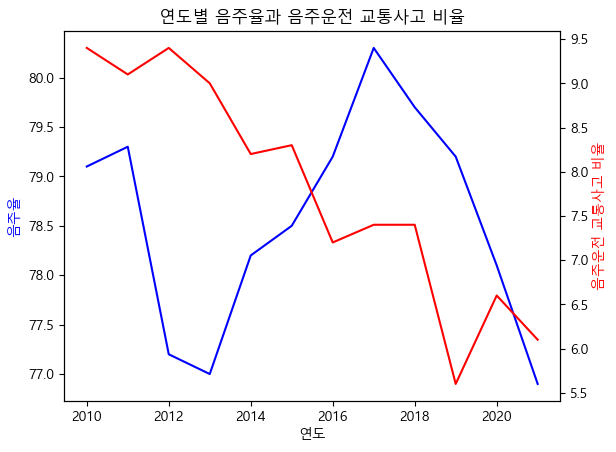

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# 음주율 그래프
ax1.plot(df['연도'], df['음주율'], color='blue')
ax1.set_xlabel('연도')
ax1.set_ylabel('음주율', color='blue')

ax2 = ax1.twinx()  # 오른쪽 축 생성

# 비율 그래프
ax2.plot(df['연도'], df['비율'], color='red')
ax2.set_ylabel('음주운전 교통사고 비율', color='red')

plt.title('연도별 음주율과 음주운전 교통사고 비율')
plt.show()

In [11]:
# 음주운전 동승률 추이
drunk_pa = pd.read_csv('./음주운전 동승률/연간_음주운전차량_동승률(전체)_추이.csv', encoding='cp949')
drunk_pa.head()

,성별,특성구분,특성별,2010응답자수 (명),2010분율 (%),2010표준오차,2011응답자수 (명),2011분율 (%),2011표준오차,2012응답자수 (명),...,2018표준오차,2019응답자수 (명),2019분율 (%),2019표준오차,2020응답자수 (명),2020분율 (%),2020표준오차,2021응답자수 (명),2021분율 (%),2021표준오차
0,전체,전체,19세이상,6257,17.2,0.8,6027,17.4,0.8,5591,...,0.5,6190,5.9,0.4,5858,4.6,0.3,5635,3.8,0.3
1,전체,전체,19세이상(표준화),6257,17.5,0.8,6027,18.0,0.8,5591,...,0.5,6190,5.9,0.4,5858,4.6,0.3,5635,3.7,0.3
2,전체,연령별1,19-29세,771,21.8,2.3,678,20.5,1.9,637,...,1.1,749,7.4,1.0,798,3.7,0.7,673,3.2,0.8
3,전체,연령별1,30-39세,1254,19.8,1.4,1098,21.5,1.5,960,...,0.9,916,4.2,0.7,766,3.7,0.7,646,3.7,0.9
4,전체,연령별1,40-49세,1162,17.3,1.3,1056,18.8,1.5,958,...,1.0,1107,6.0,0.9,965,6.5,0.8,955,3.8,0.7


In [12]:
year_drink
year_drink_age = year_drink[year_drink['특성별(1)']=='연령별1']
year_drink_age = year_drink_age[year_drink_age['성별']=='전체']
year_drink_age_extracted = year_drink_age.filter(regex='분율|특성별\(2\)')
year_drink_age_extracted

,특성별(2),2010분율 (%),2011분율 (%),2012분율 (%),2013분율 (%),2014분율 (%),2015분율 (%),2016분율 (%),2017분율 (%),2018분율 (%),2019분율 (%),2020분율 (%),2021분율 (%)
2,19-29세,89.0,91.6,88.4,88.0,89.3,89.2,89.2,89.3,87.6,89.8,87.7,88.6
3,30-39세,87.1,86.5,81.5,84.7,83.8,83.2,85.8,87.0,86.3,85.8,85.9,84.7
4,40-49세,83.4,80.6,81.5,79.0,82.7,82.9,82.4,85.3,84.5,82.6,81.3,78.9
5,50-59세,74.9,74.4,73.1,73.6,71.0,74.3,76.5,75.3,75.0,73.0,74.7,73.0
6,60-69세,60.7,65.6,60.7,60.5,60.5,64.0,63.1,67.3,67.1,66.8,61.6,61.9
7,70세이상,41.7,41.5,45.3,40.5,48.8,44.3,43.4,42.7,45.4,43.0,41.8,37.0


In [13]:
df = year_drink_age_extracted.T
df2 = df.copy()
df2

,2,3,4,5,6,7
특성별(2),19-29세,30-39세,40-49세,50-59세,60-69세,70세이상
2010분율 (%),89.0,87.1,83.4,74.9,60.7,41.7
2011분율 (%),91.6,86.5,80.6,74.4,65.6,41.5
2012분율 (%),88.4,81.5,81.5,73.1,60.7,45.3
2013분율 (%),88.0,84.7,79.0,73.6,60.5,40.5
2014분율 (%),89.3,83.8,82.7,71.0,60.5,48.8
2015분율 (%),89.2,83.2,82.9,74.3,64.0,44.3
2016분율 (%),89.2,85.8,82.4,76.5,63.1,43.4
2017분율 (%),89.3,87.0,85.3,75.3,67.3,42.7
2018분율 (%),87.6,86.3,84.5,75.0,67.1,45.4


In [14]:
df2 = df.copy()
years = np.arange(2009, 2022)
df2['연도'] = years
df2 = df2.set_index('연도')

df2 = df2.reset_index()
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])
df2.rename(columns={df2.columns[0]:'연도'}, inplace=True)
df2
#drink_rate_age = df2.copy()

,연도,19-29세,30-39세,40-49세,50-59세,60-69세,70세이상
1,2010,89.0,87.1,83.4,74.9,60.7,41.7
2,2011,91.6,86.5,80.6,74.4,65.6,41.5
3,2012,88.4,81.5,81.5,73.1,60.7,45.3
4,2013,88.0,84.7,79.0,73.6,60.5,40.5
5,2014,89.3,83.8,82.7,71.0,60.5,48.8
6,2015,89.2,83.2,82.9,74.3,64.0,44.3
7,2016,89.2,85.8,82.4,76.5,63.1,43.4
8,2017,89.3,87.0,85.3,75.3,67.3,42.7
9,2018,87.6,86.3,84.5,75.0,67.1,45.4
10,2019,89.8,85.8,82.6,73.0,66.8,43.0


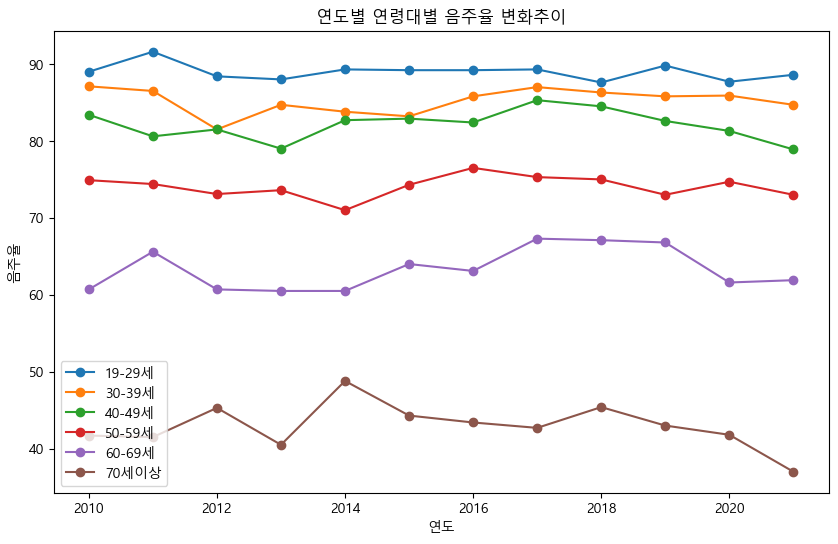

In [15]:
# 연도를 인덱스로 설정
df2.set_index('연도', inplace=True)

# 그래프 그리기
df2.plot(kind='line', marker='o', figsize=(10, 6))

# 그래프 제목과 축 이름 설정
plt.title('연도별 연령대별 음주율 변화추이')
plt.xlabel('연도')
plt.ylabel('음주율')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

In [16]:
df2 = df2.reset_index()


In [17]:
df1 = df2.copy()

In [32]:
df1.to_csv('연령별 음주운전 차량 동승률.csv', encoding='cp949',index=False)